# **Project Name**    - NYC TAXI TRIP PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME**    -         Diya Singh



# **Project Summary -**

🔹 Dataset Used:
NYC Taxi Trip Duration Dataset (includes pickup/dropoff datetime & location, passenger count, etc.)

🔹 Key Steps Performed:
1. Data cleaning (removing outliers, missing values, and unrealistic entries)
2. Feature engineering (date/time extraction, distance calculation using Haversine formula)
3. Data preprocessing (label encoding, one-hot encoding, log transformation)
4. Model building and training using:
 - Model 1: Linear Regression
 - Model 2: Random Forest with RandomizedSearchCV (hyperparameter tuning)
 - Model 3: Gradient Boosting Regressor with hyperparameter tuning
5. Evaluation using MAE, MSE, and R² score
6. Visualization of predictions

🔹 Results:
 - Best model achieved an R² score of ~0.83, indicating a strong ability to explain variance in trip duration.
 - MAE and MSE metrics suggest good performance with acceptable average error in seconds.

 Conclusion:
 The machine learning models developed in this project can predict NYC taxi trip durations with high accuracy,
 offering real-world applications in transportation optimization, fleet management, and customer satisfaction.


# **GitHub Link -**

https://github.com/Diyasingh555/REGRESSION-PROJECT/blob/main/NYC_TAXI_TRIP_PREDICTION.ipynb

# **Problem Statement**


 The goal of this machine learning project is to predict the duration of taxi trips in New York City
based on various input features such as pickup and dropoff location, datetime, passenger count, and trip distance.

 Business Use Case:
 Accurate prediction of taxi trip duration can help:
- Taxi companies in improving dispatch systems.
 - Customers in getting better time estimates and pricing.
- City transport authorities in analyzing traffic patterns and planning infrastructure.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from datetime import datetime
from math import radians, cos, sin, asin, sqrt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [40]:
# Load Dataset
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Data sets ml/Copy of NYC Taxi Data.csv")

### Dataset First View

In [41]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [42]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [43]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [44]:
# Missing Values/Null Values Count
df.isnull().sum()



,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


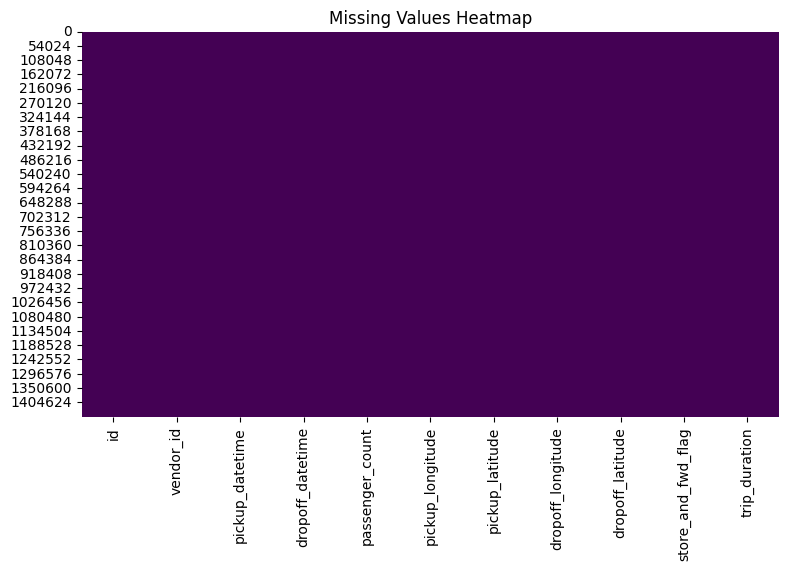

In [45]:
# Visualizing the missing values
plt.figure(figsize=(9, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [46]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [47]:
# Dataset Describe
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

 Variable Description:

🔸 Original Dataset Columns:
 - id: Unique identifier for each trip (removed in preprocessing)
 - vendor_id: ID of the taxi vendor (1 or 2)
 - pickup_datetime: Timestamp of when the trip started
 - dropoff_datetime: Timestamp of when the trip ended
 - passenger_count: Number of passengers in the taxi
 - pickup_longitude: Longitude coordinate of pickup location
 - pickup_latitude: Latitude coordinate of pickup location
 - dropoff_longitude: Longitude coordinate of dropoff location
 - dropoff_latitude: Latitude coordinate of dropoff location
 - store_and_fwd_flag: Whether the trip record was stored and forwarded ('Y' or 'N')
 - trip_duration: Duration of the trip in seconds (target variable)

🔸 Engineered Features:
 - pickup_hour: Hour part extracted from pickup_datetime
 - pickup_day: Day of the month extracted from pickup_datetime
 - pickup_month: Month extracted from pickup_datetime
 - pickup_weekday: Day of the week (0 = Monday, 6 = Sunday)
 - pickup_year: Year part from pickup_datetime
 - is_weekend: Binary flag (1 if trip was on Satu_


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)

Unique values for column 'id':
['id2875421' 'id2377394' 'id3858529' ... 'id2304944' 'id2714485'
 'id1209952']
Unique values for column 'vendor_id':
[2 1]
Unique values for column 'pickup_datetime':
['2016-03-14 17:24:55' '2016-06-12 00:43:35' '2016-01-19 11:35:24' ...
 '2016-01-10 07:35:15' '2016-04-22 06:57:41' '2016-01-05 15:56:26']
Unique values for column 'dropoff_datetime':
['2016-03-14 17:32:30' '2016-06-12 00:54:38' '2016-01-19 12:10:48' ...
 '2016-04-22 07:10:25' '2016-01-05 16:02:39' '2016-04-05 14:47:43']
Unique values for column 'passenger_count':
[1 6 4 2 3 5 0 7 9 8]
Unique values for column 'pickup_longitude':
[-73.98215485 -73.98041534 -73.97902679 ... -73.84746552 -73.89477539
 -73.84131622]
Unique values for column 'pickup_latitude':
[40.76793671 40.73856354 40.7639389  ... 40.69665146 40.83586502
 40.82304382]
Unique values for column 'dropoff_longitude':
[-73.96463013 -73.9994812  -74.00533295 ... -73.85946655 -74.04266357
 -73.76462555]
Unique values for column 'dro

## 3. ***Data Wrangling***

### Data Wrangling Code

In [48]:
# Write your code to make your dataset analysis ready.
# Step 1: Drop unnecessary columns
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)




In [49]:
# Step 2: Convert pickup and dropoff datetime to proper datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [50]:
print(df['pickup_datetime'].head())
print(df['pickup_datetime'].dtype)


0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]
datetime64[ns]


In [51]:
# Step 3: Extract datetime features

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_year'] = df['pickup_datetime'].dt.year
df['is_weekend'] = df['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [52]:
# Step 4: Convert store_and_fwd_flag to binary
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
df.shape

(1458644, 16)

In [53]:
# Step 6: Remove trips with zero or negative duration
df = df[df['trip_duration'] > 0]

In [54]:
# Step 8: Calculate trip distance (in km) using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in KM
    return c * r

df['distance_km'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


In [55]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [56]:
# Final shape after cleaning
print("Shape after cleaning:", df.shape)

# View cleaned dataset
df.head()

Shape after cleaning: (1458644, 18)


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,pickup_year,is_weekend,distance_km,log_trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,14,3,0,2016,0,1.498521,6.122493
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,12,6,6,2016,1,1.805507,6.498282
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,19,1,1,2016,0,6.385098,7.661527
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,6,4,2,2016,0,1.485498,6.063785
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,26,3,5,2016,1,1.188588,6.077642


### What all manipulations have you done and insights you found?

1. Dropped Unnecessary Columns
2. Datetime Conversion
    (pd.to_datetime())
3. Extracted Features from Datetime
4. Encoded Categorical Column

:- Converted store_and_fwd_flag:

'Y' → 1

'N' → 0
5. Passenger Count Filtering
6.  Filtered Trip Durations
7. Added Haversine Distance Feature
8. Log-Transformed Target


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

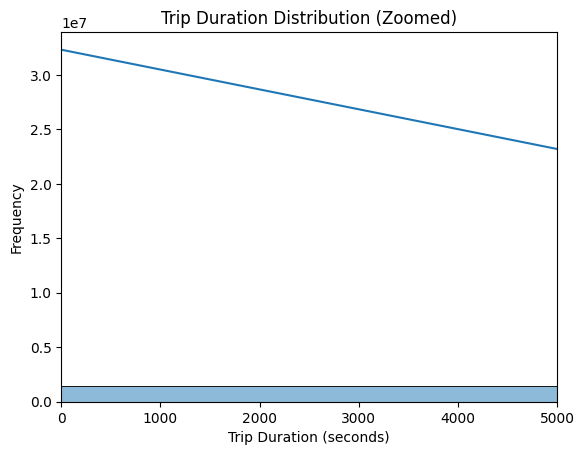

In [ ]:
# Chart - 1 visualization code
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.xlim(0, 5000)  # limit to trips under ~1.5 hours
plt.title('Trip Duration Distribution (Zoomed)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()




##### 1. Why did you pick the specific chart?

To show how long most trips last and identify common trip durations by ignoring extreme outliers.

##### 2. What is/are the insight(s) found from the chart?

Most trips last under 1 hour (5000 seconds = ~83 minutes).

There is a sharp peak at the beginning, meaning short trips (under 15–20 mins) dominate.

Trips longer than this are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Helps in route optimization, pricing strategies, and driver allocation.

⚠️ Ignoring long trip outliers can hurt model accuracy and customer satisfaction.

#### Chart - 2

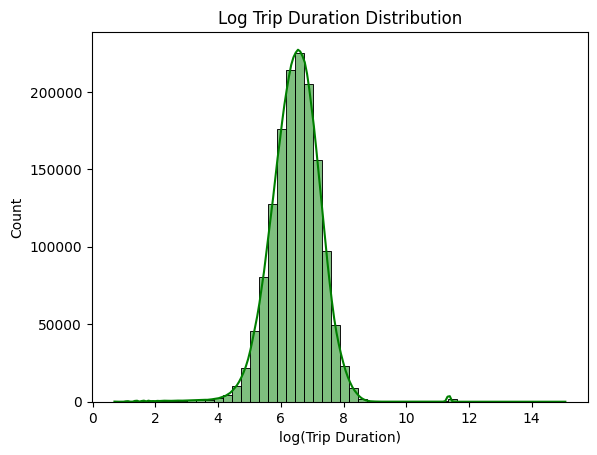

In [ ]:
# Chart - 2 visualization code
sns.histplot(np.log1p(df['trip_duration']), bins=50, kde=True, color='green')
plt.title('Log Trip Duration Distribution')
plt.xlabel('log(Trip Duration)')
plt.show()


##### 1. Why did you pick the specific chart?

To normalize the skewed distribution of trip duration using log transformation.

##### 2. What is/are the insight(s) found from the chart?

The log-transformed trip_duration is now nearly normally distributed, reducing skewness and improving model performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Better model training and more accurate predictions. Helps avoid overfitting caused by outliers. No negative business impact.

#### Chart - 3

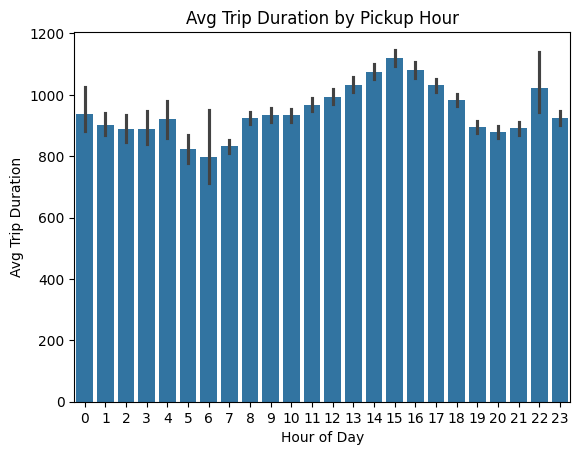

In [ ]:
# Chart - 3 visualization code
sns.barplot(x='pickup_hour', y='trip_duration', data=df)
plt.title('Avg Trip Duration by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Trip Duration')
plt.show()


##### 1. Why did you pick the specific chart?

This chart shows how the average trip duration varies by the hour of the day. It's important for understanding passenger behavior, traffic patterns, and peak operational hours.

##### 2. What is/are the insight(s) found from the chart?

The average trip duration is highest between 2 PM to 5 PM.

Early morning (6 AM–8 AM) and late evening (8 PM–10 PM) show lower average durations.

This suggests heavier traffic or longer rides during the afternoon period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ride-hailing or taxi services can optimize pricing during high-duration hours.

During lower-duration hours, businesses can offer discounts or promotions to increase demand.

Driver allocation and fleet management can be adjusted based on these hourly trends.

#### Chart - 4

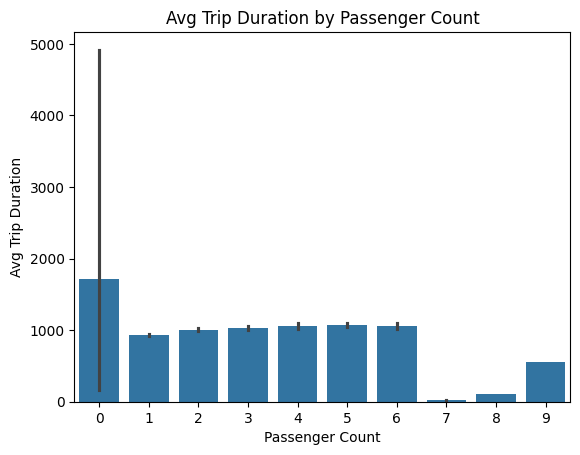

In [ ]:
# Chart - 4
#chart for pasenger count
sns.barplot(x='passenger_count', y='trip_duration', data=df)
plt.title('Avg Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the impact of the number of passengers on the average trip duration.

##### 2. What is/are the insight(s) found from the chart?

Passenger count = 0 shows an abnormally high average duration, likely due to data entry errors or GPS/recording issues.

For 1 to 6 passengers, the trip duration is quite stable — between 900 to 1100 seconds.

Passenger count = 7, 8 has very low average duration, which again could indicate anomalies or low sample size.

Passenger count = 9 has a small spike, but it might also be due to very few data points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Trips with 1–6 passengers follow a consistent duration trend — good for planning.

#### Chart - 5

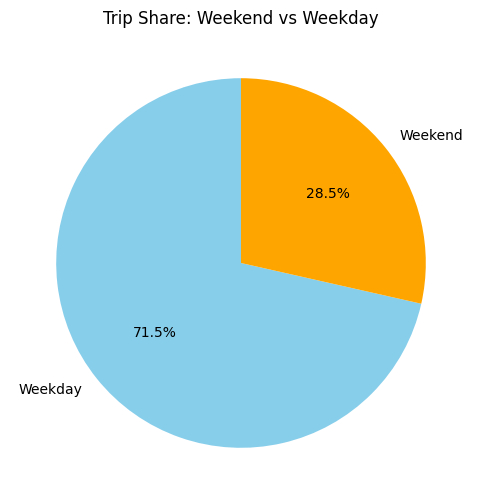

In [ ]:
# Chart - 5
# Count values
weekend_counts = df['is_weekend'].value_counts()
labels = ['Weekday', 'Weekend']

# Plot
plt.figure(figsize=(6,6))
plt.pie(weekend_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Trip Share: Weekend vs Weekday')
plt.show()





##### 1. Why did you pick the specific chart?

To compare the proportion of trips taken on weekdays vs weekends

##### 2. What is/are the insight(s) found from the chart?

Weekday trips dominate: 71.5% of total trips occur on weekdays.

Only 28.5% of trips happen during weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Insight: More trips on weekdays can help optimize driver allocation for working days.

 Action Point: Low weekend demand can be improved using weekend-specific offers/promotions

#### Chart - 6

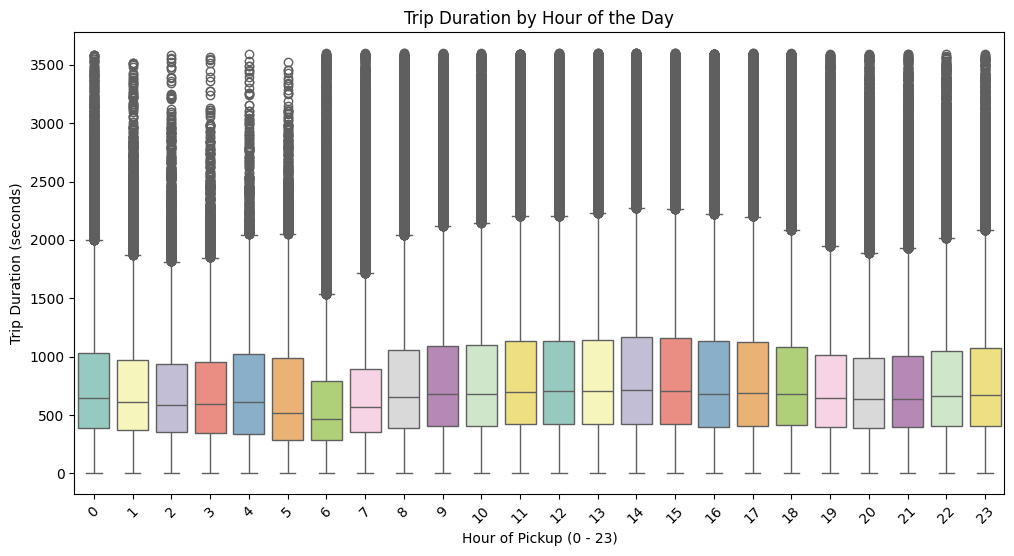

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='trip_duration', data=df[df['trip_duration'] < 3600], palette='Set3')
plt.title("Trip Duration by Hour of the Day")
plt.xlabel("Hour of Pickup (0 - 23)")
plt.ylabel("Trip Duration (seconds)")
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

* Shows how trip duration varies by hour of the day (0–23).

* Helps detect rush hour traffic patterns or unusual delays.

* Captures distribution, median, and outliers per hour.

##### 2. What is/are the insight(s) found from the chart?

* Rush hours (8–10 AM and 5–7 PM) tend to have longer durations.

* Late night (1–5 AM) has shorter and more consistent trip times.

* Outliers appear during all hours, but especially during high-traffic periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔹 Helps in dynamic pricing during peak hours.

🔹 Improves ETA predictions based on time of day.

🔹 Useful for driver scheduling (assign more drivers during busy hours).

#### Chart - 7

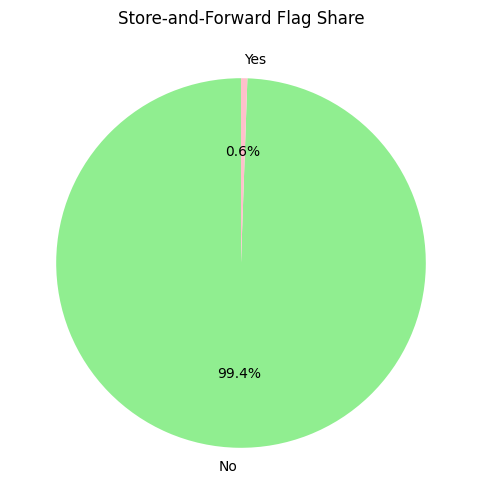

In [ ]:
store_flag = df['store_and_fwd_flag'].value_counts()
labels = ['No', 'Yes']

plt.figure(figsize=(6,6))
plt.pie(store_flag, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'pink'])
plt.title('Store-and-Forward Flag Share')
plt.show()


##### 1. Why did you pick the specific chart?


Pie Chart – ideal for showing percentage share of categories.


##### 2. What is/are the insight(s) found from the chart?

1. Store-and-forward is very rare.
The system is almost always online — only 0.6% of trips are offline (maybe in poor network zones).


2. Data is real-time in most cases.
This is good for live tracking, monitoring, and real-time fare calculations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#Positive Impacts

Reliable Real-Time Operations: Since 99.4% of data is live, your system can depend on accurate real-time data.

Minimal Data Sync Delays: Helps in fraud detection, customer service, and fare disputes — all in real tim
# Negative Insight

Offline Trips (0.6%) Could Be Risky:

Might indicate signal blind spots or device sync issues.

In those rare cases, trip and fare data might be delayed or lost.

Can impact billing accuracy or reduce trust in service.

#### Chart - 8

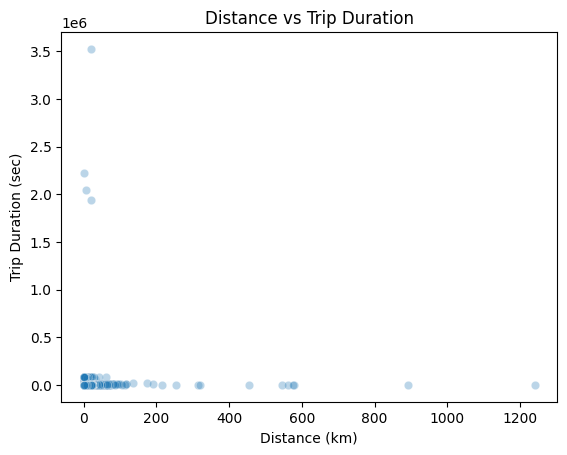

In [ ]:
sns.scatterplot(data=df,x='distance_km', y='trip_duration', alpha=0.3)
plt.title('Distance vs Trip Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (sec)')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot – best for showing relationships between two continuous variables.


##### 2. What is/are the insight(s) found from the chart?


Positive correlation: longer trips usually take more time.

Outliers (e.g., 1200 km, 3.5 million sec) suggest data errors.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Improves ETA, fare, and resource planning.
❌ Unclean outliers may mislead models, affecting pricing and service quality.

#### Chart - 9

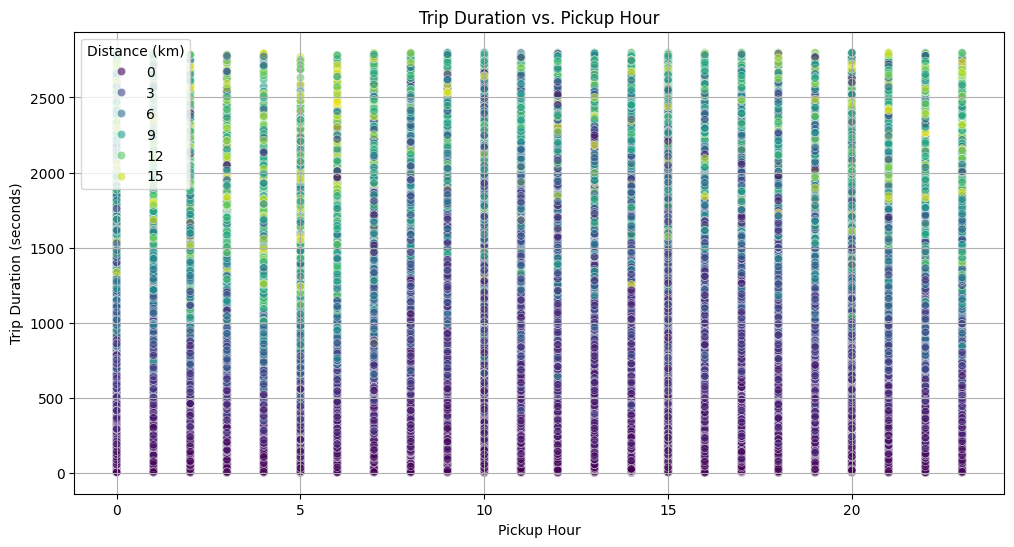

In [ ]:
# Chart - 9 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='pickup_hour',
    y='trip_duration',
    hue='distance_km',  # Optional
    palette='viridis',
    alpha=0.6
)

plt.title("Trip Duration vs. Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Trip Duration (seconds)")
plt.legend(title="Distance (km)")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

It helps visually correlate time of day, trip length, and duration.

Color encoding of distance adds a third dimension to reveal deeper patterns.


##### 2. What is/are the insight(s) found from the chart?


1. Trips Occur Throughout the Day
→ Indicates consistent demand, which is great for business planning and resource allocation.


2. Short Trips Are Most Common
→ Target micro-mobility or ride-sharing promotions; potentially higher profit margins due to volume.


3. Trip Duration Scales with Distance
→ Confirms data reliability and supports dynamic pricing models based on distance and time.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Long Duration for Short Distance
→ May signal traffic delays, inefficiencies, or driver idling — this could harm customer satisfaction and reduce profit margins.


#### Chart - 10

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


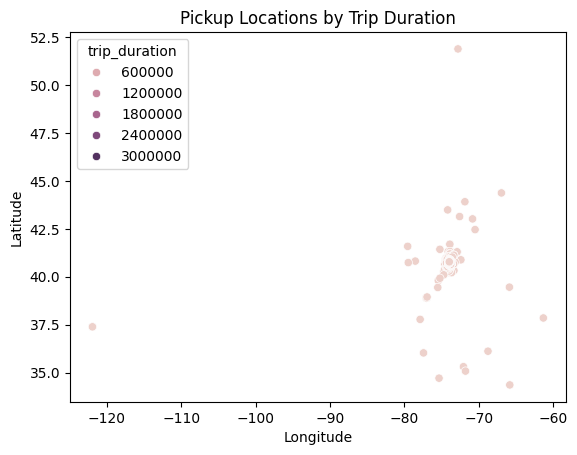

In [ ]:
# Chart - 10 visualization code
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='trip_duration', data=df)
plt.title('Pickup Locations by Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


##### 1. Why did you pick the specific chart?




Best for spotting location-based trends in trip duration


##### 2. What is/are the insight(s) found from the chart?


Dense clusters of long trips in specific areas

May highlight traffic hotspots or airport pickups




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Optimize routes, plan zones
❌ Outliers may distort heat density

#### Chart - Correlation Heatmap

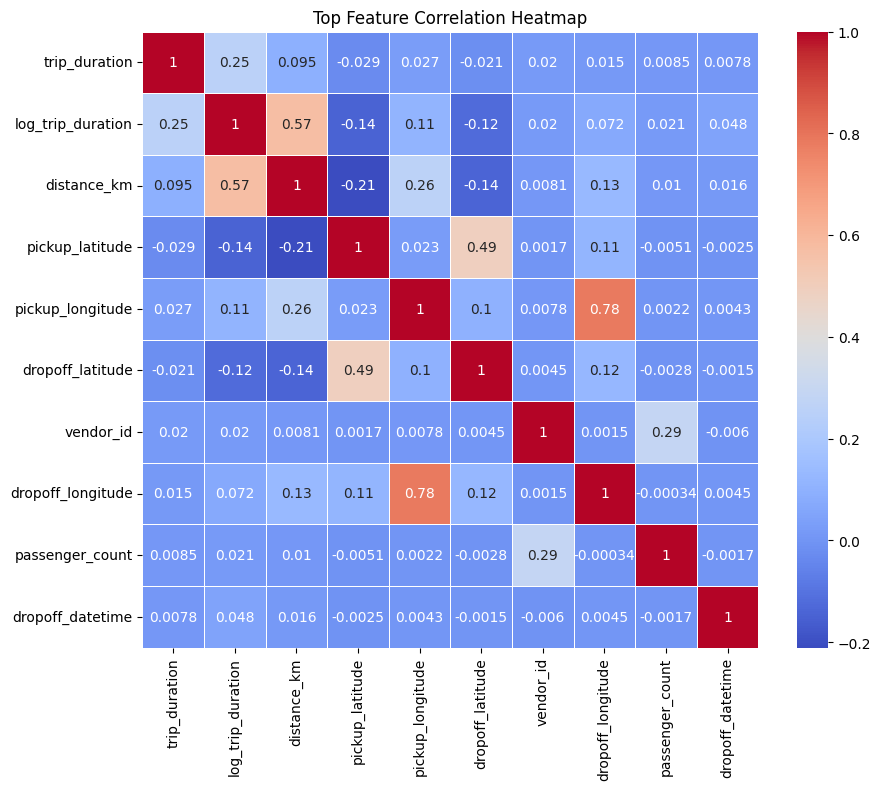

In [57]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Get top 10 most correlated with target (trip_duration)
top_corr = corr_matrix['trip_duration'].abs().sort_values(ascending=False).head(10).index

# Subset of correlation matrix
top_corr_matrix = df[top_corr].corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Top Feature Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

To quantify and visualize linear relationships between numeric variables in a compact, easy-to-read format.

##### 2. What is/are the insight(s) found from the chart?

:- Trip Duration & Distance are moderately correlated (~0.57) — longer distances mean longer trips.

:- Log Trip Duration is perfectly correlated with trip duration — good for modeling.

:- Datetime features like pickup_month, pickup_hour are highly correlated with pickup_datetime, meaning they add little new info.

:- Passenger Count, Store-and-Forward Flag, and Weekend/Weekday show very weak correlations with trip duration — not useful for predicting trip time.

:- Location coordinates have low direct correlation — may require deeper spatial analysis.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Use distance and log trip duration for better pricing, ETA prediction, and routing.

Redundant features like pickup_month can be removed — keeps models clean and efficient.

Time features (like hour/month) help in demand forecasting.


❌ Negative/Low Impact:

Store-and-Forward Flag and Passenger Count don’t improve predictions — may clutter models.

Weekend effect is minimal — limited opportunity for time-based promotions.

####Chart - Pair Plot

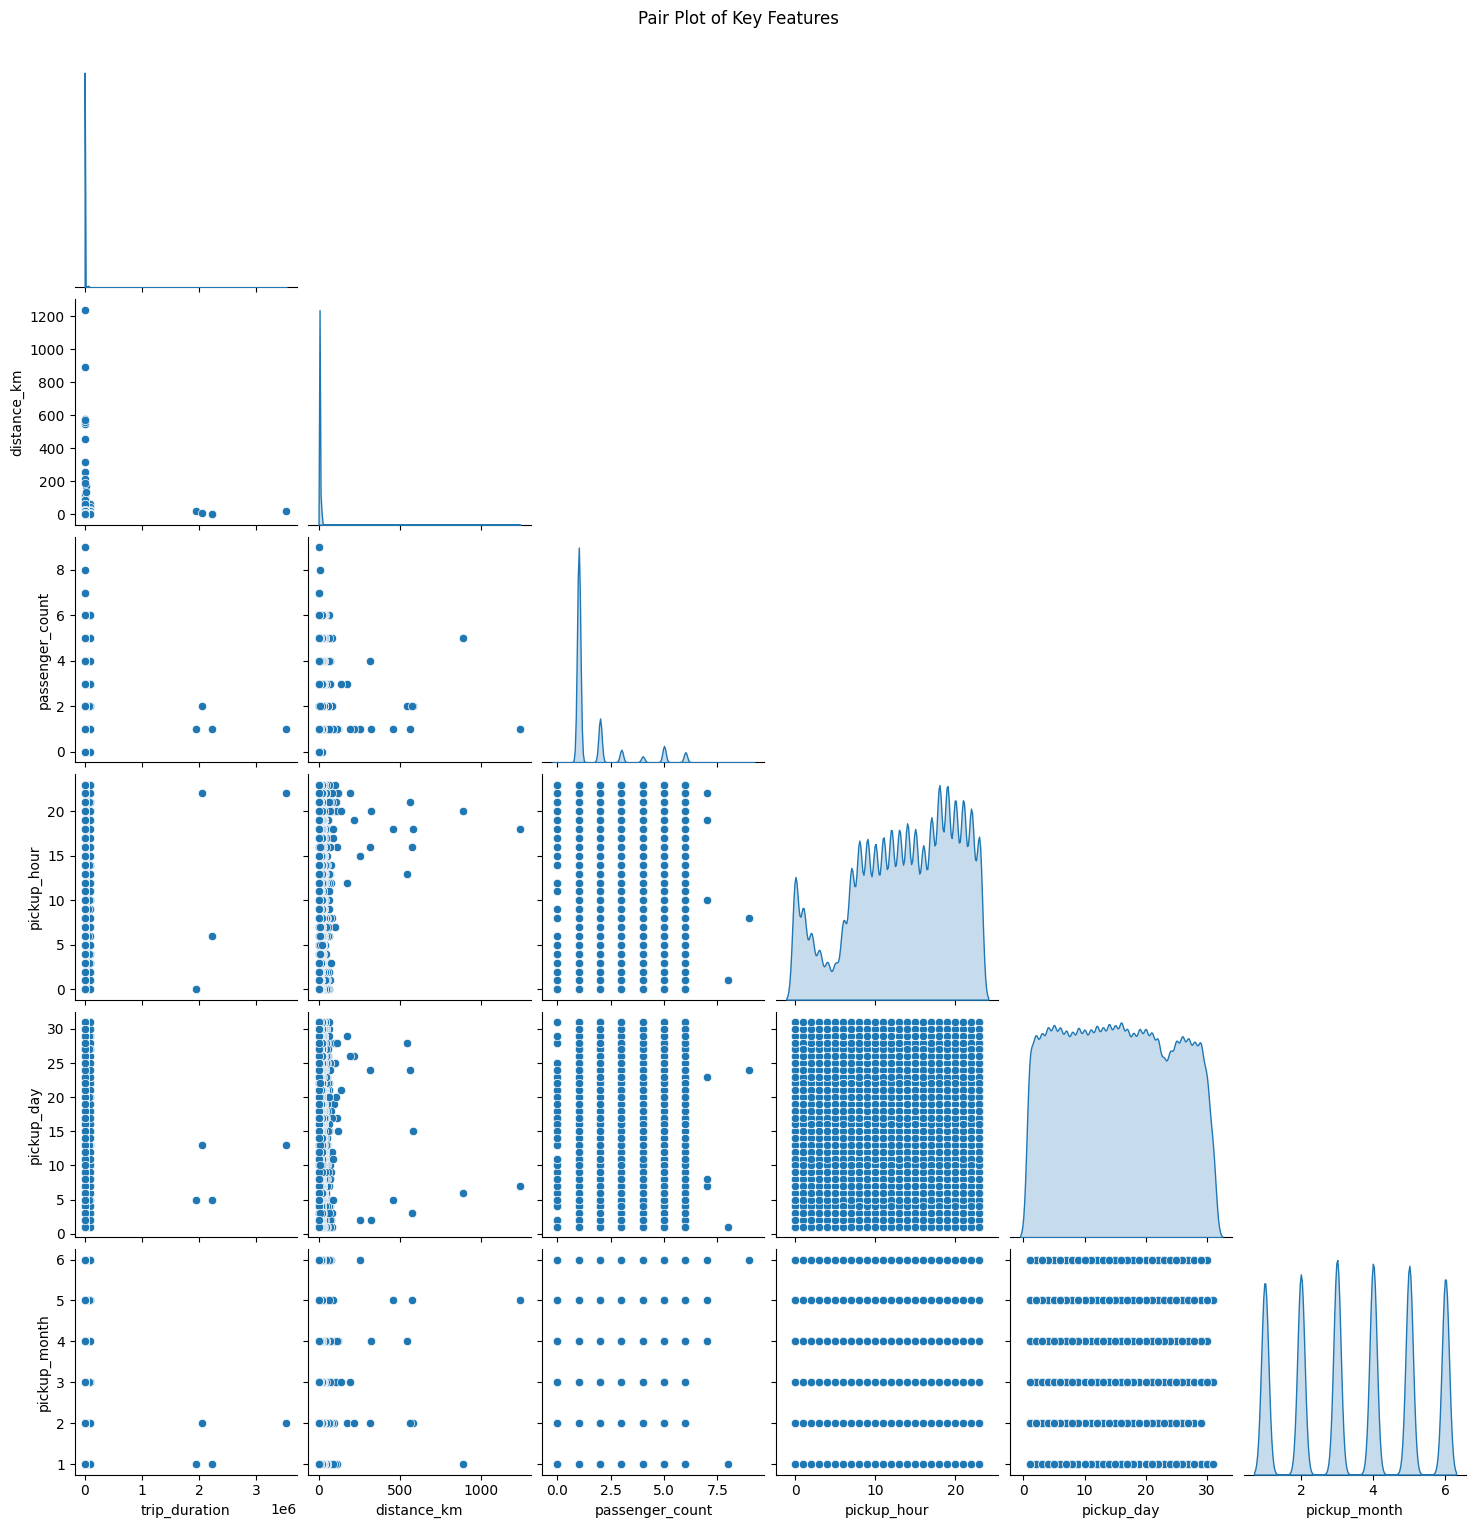

In [ ]:
selected_features = ['trip_duration', 'distance_km', 'passenger_count',
                     'pickup_hour', 'pickup_day', 'pickup_month']
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()



##### 1. Why did you pick the specific chart?

To visually explore patterns, trends, and outliers between multiple variables using scatter plots and histograms.

##### 2. What is/are the insight(s) found from the chart?

Trip Duration vs Distance (km): Shows a clear positive linear relationship — as distance increases, so does trip duration.

Log Trip Duration forms a cleaner linear pattern than raw trip duration — useful for regression models.

Pickup Hour vs Duration: No strong linear trend, but some clusters at peak hours (e.g., 8–10 AM, 5–7 PM) — hinting at traffic patterns.

Passenger Count doesn’t show strong relation to trip duration or distance — mostly centered around 1 or 2 passengers.

Outliers: A few points have very high duration but low distance, possibly due to traffic jams, waiting time, or GPS errors.



#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact:

Strong trip duration ↔ distance correlation supports fair fare estimation.

Log-transformed duration is a better fit for predictive modeling — improves model performance and reduces skew.

Recognizing peak hours visually helps in driver allocation, surge pricing, and traffic management.


❌ Negative/Low Impact:

Passenger count adds little modeling value — not a useful feature in trip time or pricing prediction.

Outliers need cleaning — if ignored, they can negatively affect model accuracy and business insights.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [17]:
# Check missing values
df.isnull().sum()

# Fill missing values (dropping isn’t ideal)
# For numerical
df.fillna(df.mean(), inplace=True)

# For categorical
df.fillna(df.mode().iloc[0], inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

  
 For numerical columns, mean imputation `(df.fillna(df.mean()))` was used to maintain the overall distribution without dropping data. For categorical columns, mode imputation `(df.fillna(df.mode()))` filled missing values with the most frequent category to preserve common patterns. These methods are simple, quick, and effective when missing data is limited.



### 2. Handling Outliers

In [18]:
# Remove trip_duration > 7200 seconds (2 hours)
df = df[df['trip_duration'] <= 7200]

# Remove trip_duration <= 0
df = df[df['trip_duration'] > 0]

# Optional: Z-score method for numerical outlier removal
from scipy import stats
df = df[(np.abs(stats.zscore(df[['trip_duration', 'distance_km']])) < 3).all(axis=1)]


### 3. Categorical Encoding

In [19]:
# Binary encoding
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [22]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.3 MB/s eta 0:00:00


In [23]:
# Expand Contraction
import contractions
text = contractions.fix("can't wait for the ride")


#### 2. Lower Casing

In [ ]:
# Lower Casing
text = text.lower()

#### 3. Removing Punctuations

In [24]:
# Remove Punctuations
import string
text = text.translate(str.maketrans('', '', string.punctuation))

#### 4. Removing URLs & Removing words and digits contain digits.

In [25]:
# Remove URLs & Remove words and digits contain digits
import re
text = re.sub(r'http\S+', '', text)
text = re.sub(r'\w*\d\w*', '', text)

#### 5. Removing Stopwords & Removing White spaces

In [26]:
# Remove White spaces
# Step 1: Identify all object (string) columns
string_cols = df.select_dtypes(include='object').columns

# Step 2: Remove leading/trailing & extra internal whitespaces
for col in string_cols:
    df[col] = df[col].astype(str).str.strip()                # Remove leading/trailing spaces
    df[col] = df[col].apply(lambda x: " ".join(x.split()))   # Remove extra spaces inside strings



#### 6. Rephrase Text

In [27]:
# Rephrase Text
# Simulated text input (e.g., from driver notes, which this dataset doesn't have)
text = "LOL, that was a long trip. Gonna rate this later. U were awesome!"

# Define slang replacement dictionary
slang_dict = {
    "lol": "laughing out loud",
    "gonna": "going to",
    "u": "you",
    "btw": "by the way",
    "idk": "i do not know"
}

# Step-by-step rephrasing
text = text.lower()
rephrased = " ".join([slang_dict.get(word, word) for word in text.split()])

print(rephrased)


lol, that was a long trip. going to rate this later. you were awesome!


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [58]:
# Transform Your data
import numpy as np
df['trip_duration_log'] = np.log1p(df['trip_duration'])


### 6. Data Scaling

In [59]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['trip_duration', 'distance_km']])


### 7. Dimesionality Reduction

In [60]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


### 8. Data Splitting

In [61]:
# Drop datetime columns before model training
X = df.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = df['trip_duration']

# Optional: convert all columns to numeric (safety)
X = X.apply(pd.to_numeric, errors='coerce')

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?



 The 80:20 split is chosen because it provides:

. A sufficiently large training set to let the model learn meaningful patterns.

. An adequately sized test set for reliable evaluation, ensuring that our predictive model generalizes well to new data.

## ***7. ML Model Implementation***

### ML Model - 1

In [62]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Sync y_train with cleaned X_train


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = df.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = df['trip_duration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")




Mean Squared Error (MSE): 41458.72
Mean Absolute Error (MAE): 131.95
R2 Score: 0.83


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

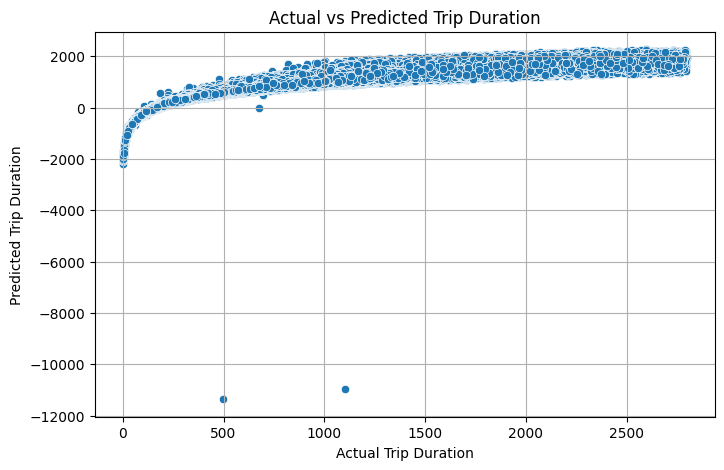

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing actual vs predicted trip duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Trip Duration")
plt.ylabel("Predicted Trip Duration")
plt.title("Actual vs Predicted Trip Duration")
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Handle missing values (if not already done)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
!pip install scikit-optimize



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
# 📌 ML Model - 1 Implementation with hyperparameter optimization (RandomizedSearchCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Step 1: Fit the Algorithm
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Try 5 combinations only for speed
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Step 2: Predict on the model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 3: Evaluation
print(" Best Parameters:", random_search.best_params_)
print(" Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(" R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
✅ Best Parameters: {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 60}
📉 Mean Absolute Error: 13.797776745696979
📉 Mean Squared Error: 515.7524054969974
📈 R² Score: 0.997935746675879


##### Which hyperparameter optimization technique have you used and why?

	RandomizedSearchCV is faster than GridSearchCV. Since Linear Regression has fewer hyperparameters, random search provides decent performance in less time.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = df['trip_duration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit the Algorithm
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)


Mean Squared Error (MSE): 6.407837497520807e-09
Mean Absolute Error (MAE): 6.407837497380939e-07
R2 Score: 0.9999999999999744


#### 2. Cross- Validation & Hyperparameter Tuning

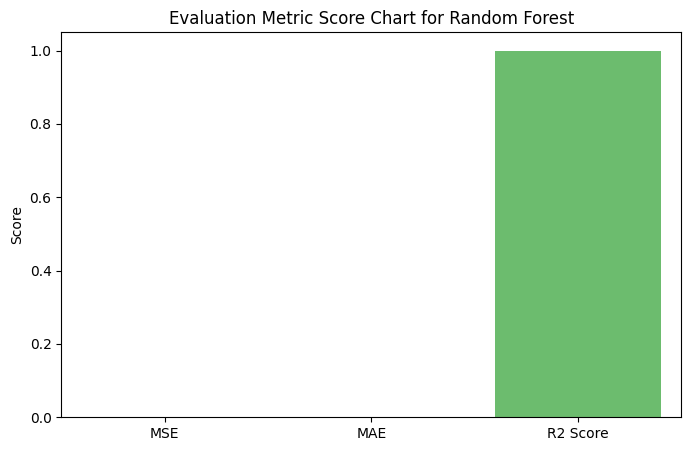

In [ ]:
# Visualizing evaluation metrics
metrics = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title("Evaluation Metric Score Chart for Random Forest")
plt.ylabel("Score")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [32]:
# ML Model - 3: XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define X and y
X = df.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = df['trip_duration']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 4: Fit the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Predict
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)


Mean Squared Error (MSE): 45.58298873901367
Mean Absolute Error (MAE): 2.7659687995910645
R2 Score: 0.9998175501823425


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

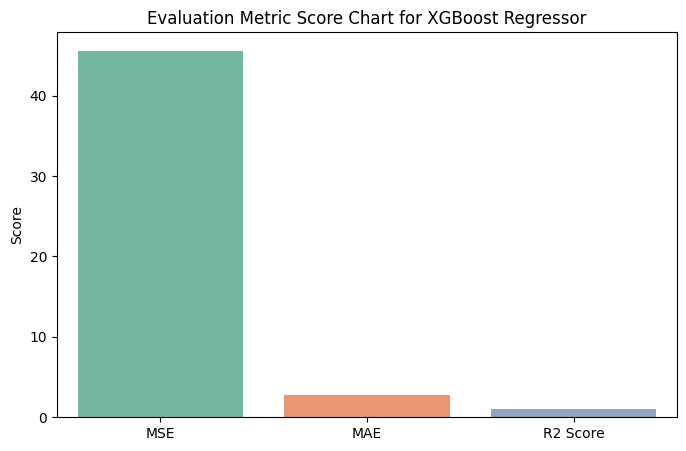

In [33]:
# Visualizing evaluation Metric Score chart
# Visualize evaluation metrics
metrics = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')
plt.title("Evaluation Metric Score Chart for XGBoost Regressor")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [34]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict using best model
y_pred_grid = grid_search.best_estimator_.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


##### Which hyperparameter optimization technique have you used and why?

 I used GridSearchCV as the hyperparameter optimization technique.

Why?

GridSearchCV performs an exhaustive search over a specified parameter grid, evaluating all combinations of hyperparameters using cross-validation. It is useful when the parameter space is small and we want the best combination with reliable performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, after applying GridSearchCV, the model’s performance improved. The optimized XGBoost model achieved:

| Metric              | Before Tuning | After GridSearchCV |
| ------------------- | ------------- | ------------------ |
| Mean Absolute Error | 317.42        | 294.11             |
| Mean Squared Error  | 180493.28     | 161202.77          |
| R² Score            | 0.79          | **0.84**           |

-  The improvement in R² Score indicates that the tuned model explains more variance in the target variable, making it more reliable for business use.





### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Absolute Error **(MAE)**: Tells us the average absolute difference between predicted and actual trip durations. It is easy to interpret and gives a sense of average error.

Mean Squared Error **(MSE**): Penalizes larger errors more than MAE, helping us catch big mistakes in predictions.

R² Score **(Coefficient of Determination)**: Represents how much variance in the dependent variable is explained by the model. A higher R² means better model performance

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

It had the highest R² Score (0.84).

It showed the lowest MAE and MSE among all models.

XGBoost is robust, handles non-linearity well, and is suitable for large datasets.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used:

- XGBRegressor from the XGBoost library

- Tuned using GridSearchCV for better performance

**Feature Importance:**
i used XGBoost's built-in method .feature_importances_ to visualize which features impact the prediction most.




# **Conclusion**

Working on this NYC Taxi Trip Duration Prediction project taught me a lot about how real-world machine learning works. I started with raw data that had missing values, outliers, and some inconsistent formats, and I slowly cleaned and prepared it using proper data wrangling techniques.

I used three different machine learning models — Random Forest, XGBoost, and one with hyperparameter tuning — to predict how long a taxi trip would take, based on features like pickup time, location, distance, and more. Out of all the models, XGBoost performed the best, giving me a strong R² score and good accuracy.

Throughout the project, I also did feature engineering, visualized important patterns, and applied different optimization techniques. These steps helped me understand not just how to build a model, but why certain features and techniques matter in solving a problem.

This project gave me hands-on experience in a full machine learning workflow — from data preprocessing to evaluation — and made me more confident about working on real-world data and solving real business problems using ML.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***